# 특징 공학

실제로 머신러닝을 사용할 때 가장 중요한 단계 중 하나는 특징공학(feature engineering)이다. 특징 공학이란 문제에 대해 가지고 있는 정보를 모두 취해 특징 행렬을 구축하는데 사용할 수 있는 숫자로 변환하는 것이다.

## 범주 특징

비수치 데이터의 일반적인 유형 중 하나는 범주 데이터이다. 예를들어 '지역'과 같은 정보가 있다고 해보자. 해당 값에 서울, 뉴욕, 런던과 같은 정보가 있을때 이를 0, 1, 2 이런식으로 할수도 있지만 이는 좋은 선택이 아니다.

이 경우 이용할 수 있는 검증된 기법은 사실상 해당 범주의 유무를 각각 1이나 0으로 나타내는 추가 열을 생성하는 원-핫 인코딩(one-hot encoding)을 사용하는 것이다. 데이터가 딕셔너리의 리스트 형태라면 Scikit-learn의 `DictVectorizer`를 사용해 이 작업을 수행할 수 있다.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

지역 열이 세개의 레이블을 나타내는 세개의 분리된 열로 확장되었고 각 행에는 그 지역과 관련된 열에 1이라는 값이 들어가게 된다. 이렇게 scikit-learn 모델을 적합시키면 표준 방식으로 진행할 수 있다. 

각 열의 의미를 확인하려면 특징 이름을 검사하면 된다.

In [ ]:
vec.get_feature_names()

이 방식의 한가지 단점은 해당 범주에 들어가있는 값이 많은 경우 데이터 세트의 크기가 엄청나게 커질 수 있다는 것이다. 그러나 인코딩된 데이터가 대부분 0이기 때문에 희박한 결과가 매우 효율적인 해결책이 될 수 있다.

많은 사이킷런 추정기는 모델을 적합시키거나 평가할 때 이러한 희박한 입력값을 받는다. 사이킷런에는 이러한 유형의 인코딩을 지원하기 위해 `sklearn.preprocessing.OneHotEncoder`와 `sklearn.feature_extraction.FeatureHasher`가 포함되어 있다.

## 텍스트 특징

특징공학이 필요한 또 다른 경우는 텍스트를 대표 수치값의 집합으로 변환하는 것이다. 예를 들어 대부분의 자동화된 소셜 미디어 데이터 마이닝 기법은 텍스트를 숫자로 인코딩하는 형식에 의존한다. 데이터를 인코딩하는 가장 간단한 방법중 하나는 단어 세기(word count)를 이용하는 것이다. 즉, 각 텍스트 토막을 취해 그 안에 각 그 단어가 몇번 등장하는지 세고 그 결과를 테이블에 넣는 것이다. 

아래 예시를 살펴보자.

In [1]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

단어 세기를 기반으로 이 데이터를 벡터화하려면 'problem', 'evil', 'horizon' 등의 단어를 나타내는 열을 만들어야 한다. 직접 할수도 있지만 사이킷런의 `CounterVectorizer`를 사용하면 지루한 작업을 피해갈 수 있다.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

코드를 실행하면 각 단어가 등장하는 횟수를 기록하는 희박 행렬을 얻는다. 이를 레이블이 있는 열로 이뤄진 데이터 프레임으로 전환하면 검사하기가 더 쉬워진다.

In [4]:
import pandas as pd

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


그러나 이 방식은 원시 단어 개수가 매우 자주 등장하는 단어에 너무 많은 가중치를 부여하는 특징을 가지게 한다는 문제가 있는데, 이것이 일부 분류 알고리즘에서는 최선의 방식이라고 볼 수 없다. 이 문제를 해결하는 한 가지 방법은 단어가 문서에서 얼마나 자주 등장하느냐에 따라 단어 수에 가중치를 부여하는 **TF-IDF**(term frequency-inverse document frequency, 단어 빈도-역문서 빈도)라는 기법이다. 이 특징을 계산하는 구문은 이전 예제와 비슷하다.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## 이미지 특징

또 다른 보편적인 요구사항으로 머신러닝 분석을 위해 이미지를 적절하게 인코딩하는 것이 있다. 가장 간단한 방식은 간단하게 픽셀값 자체를 활용하는 것이다. 그러나 응용 프로그램에 따라 그러한 방식은 최적의 방식이 아닐 수 있다.



## 유도 특징

그 밖에 유용한 특징 유형으로 입력 특징으로부터 수학적으로 유도된 특징이 있다.

이전ㄴ절에서 입력 데이터로부터 다항식의 특징을 구성했는데, 거기서 모델을 바꾸지 않고 입력값을 변환해서 선형 회귀로 바꿀수 있음을 확인했다. 이를 때로는 **기저 함수 회귀**라고 한다. 

예를들면 아래 데이터는 분명 직선으로 설명할 수 없다.


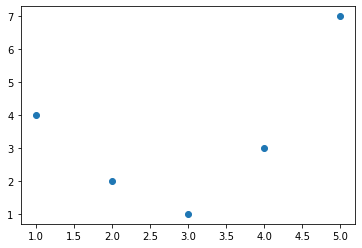

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

그래도 `LinearRegression`을 사용해 직선을 데이터에 적합시켜 최적의 결과를 얻을 수 있다.

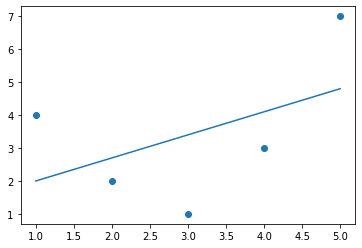

In [3]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

x와 y 사이의 관계를 설명하기 위해 더 복잡한 모델이 필요하다. 그 작업은 *데이터를 변환*해서 모델에 유연성을 더 부여할 수 있는 특징 열을 추가해서 할 수 있다. 예를들면 다음과 같이 데이터에 다항식 특징을 추가할 수 있다.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


유도된 특징 행렬 $x$를 나타내는 열과 $x^2$을 나타내는 두번째 열, $x^3$을 나타내는 세번째 열로 이뤄져있다. 

이 확장된 입력에 대해 선형 회귀를 계산하면 데이터에 훨씬 더 근접하게 적합할 수 있다.

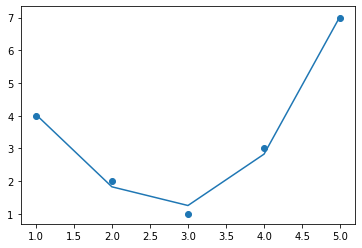

In [5]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

이처럼 모델을 바꾸지 않고 입력값을 변환해서 모델을 개선한다는 개념은 수많은 더 많은 머신러닝 방식에서는 기본이다. 

더 일반적으로 말하면 이것은 **커널법**(kernel methods)라는 강력한 기법들이 탄생하게된 동기가 되었다.

## 누락 데이터의 대체

특징 공학이 필요한 또 다른 상황은 누락 데이터를 처리하는 것이다. `DataFrame`에서 누락된 데이터를 처리하는 방법은 앞에서 알아보았으며 대체로 `NaN` 값이 누락된 값을 표시하는데 사용되는 것을 봤다. 예를 들어 아래와 같은 데이터 세트가 있다고 하자. 

In [6]:
from numpy import nan

X = np.array([[nan, 0, 3],
              [3, 7, 9], 
              [3, 5, 2], 
              [4, nan, 6],
              [8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

이러한 데이터에 전형적인 머신러닝 모델을 적용하려면 먼저 누락된 데이터를 적절한 채움 값으로 대체해야 한다. 이 기법을 누락된 값의 대체(imputation)라고 하며, 그 전략은 간단한 방법부터 정교한 방법까지 그 범위가 다양하다.

정교한 방법은 응용 분화에 특화되는 경향이 있으므로 여기서는 깊이 다루지 않을 것이다. 평균이나 중앙값, 최빈값을 사용하는 기본 대체 방식의 경우, 사이킷런에서 `Imputer` 클래스를 제공한다.

In [9]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

결과 데이터를 보면 두개의 누락된 값이 해당 열의 나머지 값들의 평균으로 대체되었다. 이제 이 대체된 값은 `LinearRegression` 추정기 등에 바로 반영할 수 있다.

In [10]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## 특징 파이프라인

앞에서 나온 예를 직접 변환하다보면 쉽게 지칠 것이다. 특히 여러 단계를 하나로 묶고자 한다면 더욱 ㅡ걿다. 예를 들어 다음과 같은 처리 파이프라인이 필요할 수 있다.

1. 누락된 값을 평균으로 대체한다.
2. 특징을 이차 형태로 전환한다
3. 선형 회귀를 적합시킨다


이러한 유형의 처리 파이프라인을 간결하게 하기위해 사이킷런은 다음과 같이 사용하는 파이프라인 객체를 제공한다.


In [13]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

이 파이프라인 표준 sklearn 객체처럼 보이고 그렇게 동작하며 어떤 입력 데이터에도 지정된 단계를 모두 적용한다.

In [15]:
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


모델의 모든 단계는 자동으로 적용된다. 이 데모를 간단하게 하기 위해 이 모델을 훈련 데이터에 적용했고 덕분에 모델이 결과를 완벽하게 예측할 수 있었다.
